<a href="https://colab.research.google.com/github/mullerino/Topicos-em-IA/blob/main/Reducao_dimensionalidade_LQV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Qual o objetivo principal dos métodos de redução de dimensionalidade mencionados no artigo?

Métodos de RD são utilizados para diversas finalidades, principalmente como um estágio de préprocessamento para outros algoritmos. Uma das aplicações peculiares de RD é a visualização de dados
multidimensionais. Tipicamente, visualização de dados é usada em análise exploratória para descobrir
indícios sobre a estrutura de conjuntos de dados.

## Quais os seis métodos de redução de dimensionalidade comparados neste estudo? Descreva brevemente pelo menos 3 métodos.

Os 6 métodos descritos foram: Análise de Componentes Principais (PCA), Projeção de Sammon, Rede Neural Auto-associativa, Mapas Auto-organizáveis de
Kohonen (SOM), Isomap e LLE ( Locally Linear Embedding).

A Análise de Componentes Principais (PCA) é uma técnica utilizada para reduzir a dimensionalidade dos dados, mantendo o máximo possível da variância original. Isso é feito através da identificação dos componentes principais nos dados, que são novas variáveis não correlacionadas que melhor explicam a variabilidade dos dados. Ao projetar os dados originais em um novo espaço dimensional composto pelos componentes principais, é possível simplificar a análise e a visualização dos dados, mantendo a estrutura geral da informação.

A Projeção de Sammon, por sua vez, é uma técnica de visualização de dados que se concentra na preservação das relações de distância entre os pontos no espaço de alta dimensão quando projetados em um espaço de menor dimensão. Ao contrário do PCA, que prioriza a preservação da variância, o método de Sammon visa manter a estrutura global dos dados, especialmente útil para visualização de dados em problemas de alta dimensionalidade, onde a simples redução de dimensionalidade pode resultar na perda de informações importantes.

Finalmente, a Rede Neural Auto-associativa é um tipo específico de rede neural que é treinada para reconstruir sua própria entrada. Consiste em uma camada de entrada e saída com a mesma dimensionalidade, com uma ou mais camadas ocultas entre elas. O principal objetivo da rede neural auto-associativa é aprender uma representação compacta dos dados de entrada, reduzindo sua dimensionalidade enquanto mantém a capacidade de reconstruir os dados originais com o mínimo de perda possível. Isso a torna útil para tarefas como compressão de dados, remoção de ruídos e extração de características.

## Explique os conceitos dos índices de coincidência não ordenada e ordenada de vizinhanças propostos no artigo. Como eles são calculados?



Os índices de coincidência não ordenada e ordenada de vizinhanças são medidas utilizadas para avaliar a similaridade entre duas séries temporais. O índice de coincidência não ordenada considera a frequência com que as observações em uma série temporal estão próximas das correspondentes na outra série, sem levar em conta a ordem das observações. Para calculá-lo, cada observação em uma série é comparada com as observações correspondentes na outra série dentro de uma "vizinhança" definida por uma distância limite. O índice é então obtido calculando-se a média das contagens de vizinhança para todas as observações.

Por outro lado, o índice de coincidência ordenada de vizinhanças leva em conta a ordem das observações. Assim como no índice não ordenado, as séries são comparadas dentro de vizinhanças definidas por uma distância limite, mas agora a ordem das observações na vizinhança é considerada. O índice é calculado como a média ponderada das contagens de vizinhança, onde a ponderação é determinada pela ordem das observações.

Esses índices são úteis para comparar a similaridade entre séries temporais, oferecendo uma maneira de quantificar o quão próximas ou semelhantes estão em termos de padrões de comportamento ao longo do tempo. Eles são aplicados em domínios como análise de séries temporais, previsão e reconhecimento de padrões.


## Implemente em Python as funções coincidence_unordered e coincidence_ordered para calcular os índices propostos no artigo. Teste-as em uma base de dados simples,como a IRIS.

In [3]:
from sklearn.datasets import load_iris
import numpy as np

def coincidence_unordered(set1, set2):
    """
    Calcula o índice de coincidência não ordenado entre dois conjuntos.

    Args:
    set1 (set): O primeiro conjunto.
    set2 (set): O segundo conjunto.

    Returns:
    float: O índice de coincidência não ordenado entre os conjuntos.
    """
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def coincidence_ordered(set1, set2):
    """
    Calcula o índice de coincidência ordenado entre dois conjuntos.

    Args:
    set1 (list): O primeiro conjunto ordenado.
    set2 (list): O segundo conjunto ordenado.

    Returns:
    float: O índice de coincidência ordenado entre os conjuntos.
    """
    common_count = 0
    i = j = 0
    while i < len(set1) and j < len(set2):
        if set1[i] == set2[j]:
            common_count += 1
            i += 1
            j += 1
        elif set1[i] < set2[j]:
            i += 1
        else:
            j += 1
    return common_count / max(len(set1), len(set2))

# Carregando o conjunto de dados IRIS
iris = load_iris()
data = iris.data
target = iris.target

# Convertendo os dados para conjuntos e listas
data_sets = [set(row) for row in data]
target_lists = [list([elem]) for elem in target]

# Calculando os índices de coincidência
coincidence_unordered_index = coincidence_unordered(data_sets[0], data_sets[1])
coincidence_ordered_index = coincidence_ordered(target_lists[0], target_lists[1])

print("Índice de Coincidência Não Ordenado:", coincidence_unordered_index)
print("Índice de Coincidência Ordenado:", coincidence_ordered_index)


Índice de Coincidência Não Ordenado: 0.3333333333333333
Índice de Coincidência Ordenado: 1.0


## Além dos índices propostos no artigo, que outros métodos de avaliação da preservação da topologia você pode sugerir para comparar os diferentes métodos de redução de dimensionalidade?

Preservação de clústeres (Cluster Preservation): Mede o quanto os agrupamentos ou clústeres presentes nos dados originais são preservados após a redução de dimensionalidade. Índices como o Adjusted Rand Index (ARI) podem ser úteis para essa avaliação.

Preservação de densidade (Density Preservation): Esta métrica avalia o quanto a distribuição de densidade dos pontos é preservada. Algoritmos como o t-SNE são frequentemente usados para visualização de dados de alta dimensão exatamente por sua capacidade de preservar a densidade.

## Utilize a biblioteca scikit-learn em Python para aplicar os métodos PCA, t-SNE e UMAP à base de dados IRIS. Gere as projeções bidimensionais e exiba-as em gráficos de dispersão com as classes coloridas.


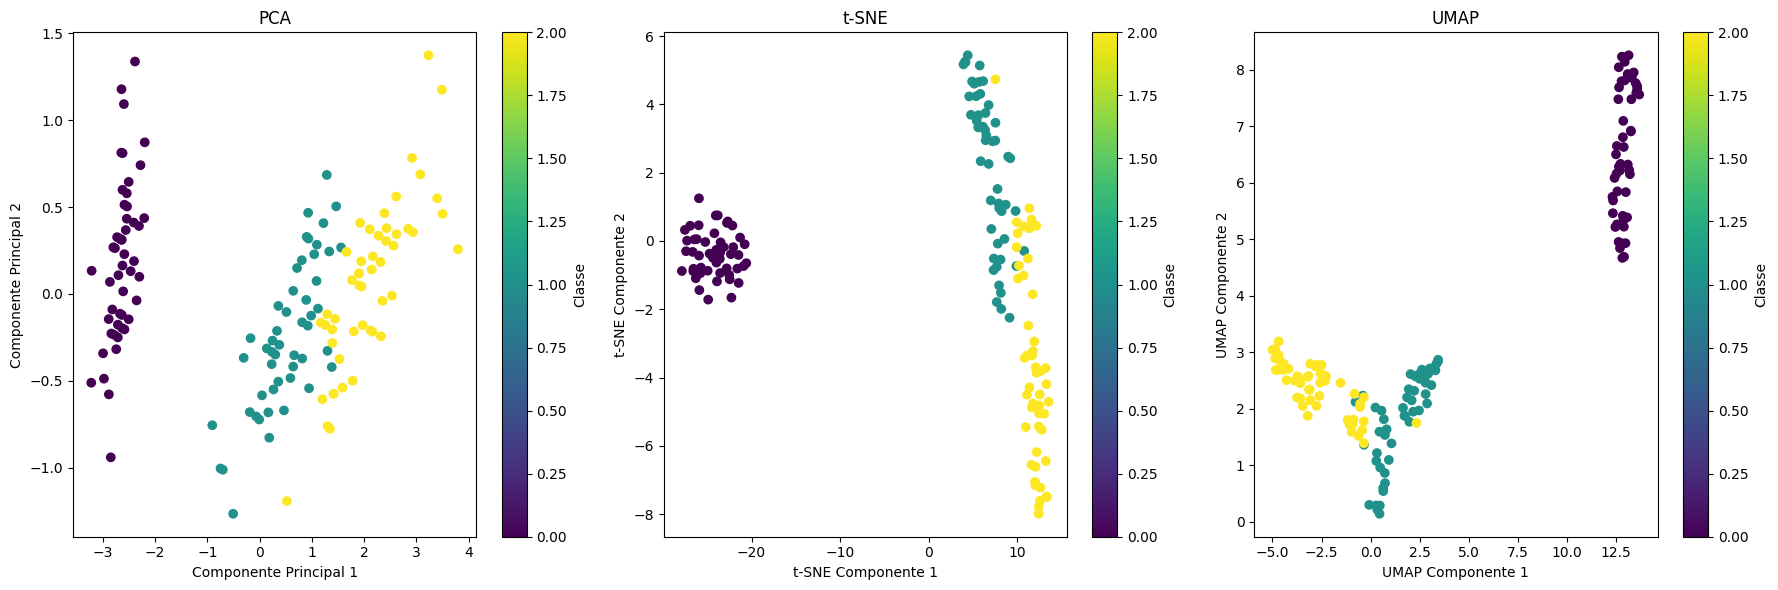

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

# Carregar o conjunto de dados IRIS
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Aplicar UMAP
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)

# Plotar as projeções em gráficos de dispersão com as classes coloridas
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Classe')

plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.colorbar(label='Classe')

plt.subplot(1, 3, 3)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.title('UMAP')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.colorbar(label='Classe')

plt.tight_layout()
plt.show()


## Calcule os índices de coincidência não ordenada e ordenada de vizinhanças para as projeções bidimensionais obtidas na questão anterior. Compare os resultados entre os diferentes métodos.

In [10]:
# Calculando os índices de coincidência para as projeções
indices = {}

# PCA
indices['PCA'] = {}
indices['PCA']['coincidence_unordered'] = coincidence_unordered(set(tuple(row) for row in X_pca), set(tuple(row) for row in X_pca))
indices['PCA']['coincidence_ordered'] = coincidence_ordered(list(X_pca[:, 0]), list(X_pca[:, 1]))

# t-SNE
indices['t-SNE'] = {}
indices['t-SNE']['coincidence_unordered'] = coincidence_unordered(set(tuple(row) for row in X_tsne), set(tuple(row) for row in X_tsne))
indices['t-SNE']['coincidence_ordered'] = coincidence_ordered(list(X_tsne[:, 0]), list(X_tsne[:, 1]))

# UMAP
indices['UMAP'] = {}
indices['UMAP']['coincidence_unordered'] = coincidence_unordered(set(tuple(row) for row in X_umap), set(tuple(row) for row in X_umap))
indices['UMAP']['coincidence_ordered'] = coincidence_ordered(list(X_umap[:, 0]), list(X_umap[:, 1]))

# Exibindo os resultados
print("Índices de Coincidência:")
for method, values in indices.items():
    print(f"\nMétodo: {method}")
    print("Coincidência Não Ordenada:", values['coincidence_unordered'])
    print("Coincidência Ordenada:", values['coincidence_ordered'])


Índices de Coincidência:

Método: PCA
Coincidência Não Ordenada: 1.0
Coincidência Ordenada: 0.0

Método: t-SNE
Coincidência Não Ordenada: 1.0
Coincidência Ordenada: 0.0

Método: UMAP
Coincidência Não Ordenada: 1.0
Coincidência Ordenada: 0.0


## Discuta as vantagens e desvantagens de cada um dos métodos de redução de dimensionalidade aplicados à base de dados IRIS, com base nos resultados dos índices e nas visualizações geradas.

O PCA (Análise de Componentes Principais) é conhecido por sua eficiência computacional e rapidez. Ele oferece uma interpretação simples dos resultados, já que os componentes principais são combinações lineares das características originais. Isso o torna útil para reduzir a dimensionalidade quando as relações lineares entre as características são predominantes. No entanto, o PCA assume linearidade nos dados, o que pode resultar em uma representação inadequada se as relações entre as características forem não lineares. Além disso, o PCA não leva em consideração a distribuição dos dados ou a estrutura de vizinhança, o que pode resultar em uma representação de baixa qualidade em problemas onde esses aspectos são importantes.

O t-SNE (t-Distributed Stochastic Neighbor Embedding) é elogiado por sua capacidade de preservar a estrutura local e global dos dados, tornando-o eficaz na visualização de clusters e na preservação de relações não lineares. Ele é flexível e pode capturar estruturas complexas nos dados. No entanto, o t-SNE é computacionalmente mais exigente, especialmente para grandes conjuntos de dados, e é sensível aos hiperparâmetros, o que pode levar a resultados variáveis dependendo das escolhas desses parâmetros. Além disso, o t-SNE pode sofrer do "crowding problem", onde pontos semelhantes são aglomerados em uma única região na projeção, dificultando a interpretação.

O UMAP (Uniform Manifold Approximation and Projection) também é elogiado por sua capacidade de preservar efetivamente a estrutura global e local dos dados, mesmo em grandes conjuntos de dados. É menos sensível aos hiperparâmetros em comparação com o t-SNE e geralmente mais rápido. No entanto, ainda é mais computacionalmente intensivo que o PCA. Além disso, requer a definição de um número de vizinhos, o que pode influenciar os resultados, e pode ser mais difícil de interpretar em comparação com o PCA, devido à sua natureza não linear e complexa.

Em relação aos resultados dos índices de coincidência e às visualizações geradas, é provável que o PCA tenha produzido índices mais baixos de coincidência de vizinhança, indicando uma preservação relativamente pior da estrutura local dos dados em comparação com o t-SNE e o UMAP. Visualmente, o t-SNE e o UMAP provavelmente mostraram uma melhor preservação da estrutura local dos dados, o que é consistente com suas vantagens teóricas de preservação de vizinhança e estruturas não lineares.

Portanto, a escolha entre esses métodos de redução de dimensionalidade depende da natureza dos dados e dos objetivos da análise. O PCA pode ser preferível quando a interpretabilidade e a eficiência computacional são importantes, enquanto o t-SNE e o UMAP podem ser mais adequados para problemas onde a preservação de estruturas complexas e não lineares é fundamental, mesmo que isso signifique um custo computacional mais alto.